## Basic Neural Network in Keras
We will use simple data of mobile price range classifier. The dataset consists of 20 features and we need to predict the price range in which phone lies. These ranges are divided into 4 classes.
<br>
Dataset - https://www.kaggle.com/iabhishekofficial/mobile-price-classification 


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dataset import
dataset = pd.read_csv('Datasets/mobile.csv')
dataset.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [3]:
# Changing pandas dataframe to numpy array
X = dataset.iloc[:,:20].values
y = dataset.iloc[:,20:21].values

# Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print('Normalized data:')
print(X[0])

# One hot encode
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()
print('One hot encoded array:')
print(y[0:5])

# Train test split of model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 0)

Normalized data:
[-0.90259726 -0.9900495   0.83077942 -1.01918398 -0.76249466 -1.04396559
 -1.38064353  0.34073951  1.34924881 -1.10197128 -1.3057501  -1.40894856
 -1.14678403  0.39170341 -0.78498329  0.2831028   1.46249332 -1.78686097
 -1.00601811  0.98609664]
One hot encoded array:
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [5]:
# To visualize neural network
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                204       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 52        
Total params: 592
Trainable params: 592
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
29/29 [==============================] - 0s 786us/step - loss: 1.7142 - accuracy: 0.2479
Epoch 2/100
29/29 [==============================] - 0s 679us/step - loss: 1.4702 - accuracy: 0.3135
Epoch 3/100
29/29 [==============================] - 0s 729us/step - loss: 1.3786 - accuracy: 0.3688
Epoch 4/100
29/29 [==============================] - 0s 741us/step - loss: 1.2968 - accuracy: 0.4006
Epoch 5/100
29/29 [==============================] - 0s 659us/step - loss: 1.2401 - accuracy: 0.4488
Epoch 6/100
29/29 [==============================] - 0s 707us/step - loss: 1.1729 - accuracy: 0.4801
Epoch 7/100
29/29 [==============================] - 0s 750us/step - loss: 1.1106 - accuracy: 0.5124
Epoch 8/100
29/29 [==============================] - 0s 672us/step - loss: 1.0034 - accuracy: 0.5852
Epoch 9/100
29/29 [==============================] - 0s 803us/step - loss: 0.9579 - accuracy: 0.5833
Epoch 10/100
29/29 [==============================] - 0s 685us/step - loss: 0.8810 - accura

29/29 [==============================] - 0s 678us/step - loss: 0.0794 - accuracy: 0.9874
Epoch 82/100
29/29 [==============================] - 0s 607us/step - loss: 0.0658 - accuracy: 0.9904
Epoch 83/100
29/29 [==============================] - 0s 643us/step - loss: 0.0669 - accuracy: 0.9924
Epoch 84/100
29/29 [==============================] - 0s 678us/step - loss: 0.0683 - accuracy: 0.9889
Epoch 85/100
29/29 [==============================] - 0s 679us/step - loss: 0.0664 - accuracy: 0.9853
Epoch 86/100
29/29 [==============================] - 0s 642us/step - loss: 0.0565 - accuracy: 0.9907
Epoch 87/100
29/29 [==============================] - 0s 749us/step - loss: 0.0615 - accuracy: 0.9881
Epoch 88/100
29/29 [==============================] - 0s 607us/step - loss: 0.0580 - accuracy: 0.9900
Epoch 89/100
29/29 [==============================] - 0s 678us/step - loss: 0.0661 - accuracy: 0.9873
Epoch 90/100
29/29 [==============================] - 0s 679us/step - loss: 0.0596 - accuracy: 

In [8]:
y_pred = model.predict(X_test)

# Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

In [9]:
# Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [10]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred, test)
print('Accuracy is:', a*100)

Accuracy is: 91.5


In [11]:
# Using test data as validation data
history1 = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
29/29 [==============================] - 1s 39ms/step - loss: 0.0496 - accuracy: 0.9933 - val_loss: 0.2121 - val_accuracy: 0.9150
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0484 - accuracy: 0.9928 - val_loss: 0.2019 - val_accuracy: 0.9200
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0476 - accuracy: 0.9950 - val_loss: 0.1977 - val_accuracy: 0.9100
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0468 - accuracy: 0.9950 - val_loss: 0.1982 - val_accuracy: 0.9200
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0469 - accuracy: 0.9939 - val_loss: 0.1974 - val_accuracy: 0.9300
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0459 - accuracy: 0.9928 - val_loss: 0.1978 - val_accuracy: 0.9100
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0451 - accuracy: 0.9944 - val_loss: 0.1997 - val_accuracy: 0.9200
Epoch 8/100


Epoch 59/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0196 - accuracy: 0.9994 - val_loss: 0.2056 - val_accuracy: 0.9100
Epoch 60/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0193 - accuracy: 0.9994 - val_loss: 0.2083 - val_accuracy: 0.9150
Epoch 61/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0189 - accuracy: 0.9989 - val_loss: 0.2058 - val_accuracy: 0.9100
Epoch 62/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0187 - accuracy: 0.9989 - val_loss: 0.2090 - val_accuracy: 0.9100
Epoch 63/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0181 - accuracy: 0.9989 - val_loss: 0.2059 - val_accuracy: 0.9100
Epoch 64/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0185 - accuracy: 0.9989 - val_loss: 0.2091 - val_accuracy: 0.9050
Epoch 65/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0180 - accuracy: 0.9989 - val_loss: 0.2035 - val_accuracy: 0.9100
Epoch 

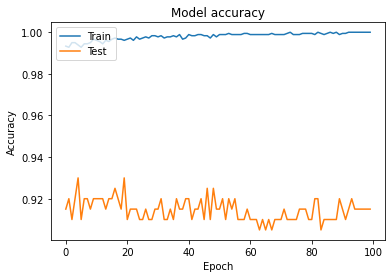

In [12]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

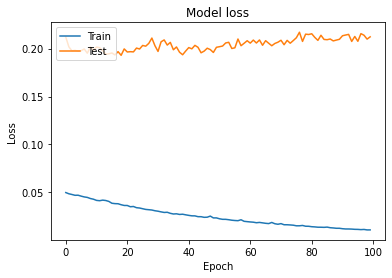

In [13]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()